In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the numerical variables of the Student Dataset
data = pd.read_csv('../student_performance_updated_1000.csv', usecols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade'])
data.head()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,FinalGrade
0,85.0,15.0,78.0,80.0
1,90.0,20.0,85.0,87.0
2,78.0,10.0,65.0,68.0
3,92.0,25.0,90.0,92.0
4,NaN,18.0,82.0,85.0


### Top-coding important

Top-coding and bottom-coding, as any other feature pre-processing step, should be determined over the training set, and then transferred onto the test set. This means that we should find the upper and lower bounds in the training set only, and use those bands to cap the values in the test set.

In [4]:
# divide dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.FinalGrade,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((700, 4), (300, 4))

## Outliers in continuous variables

* We can see that `StudyHoursPerWeek` and `PreviousGrade` are continuous variables. So, first I will cap the outliers in those variables.

Text(0, 0.5, 'PreviousGrade')

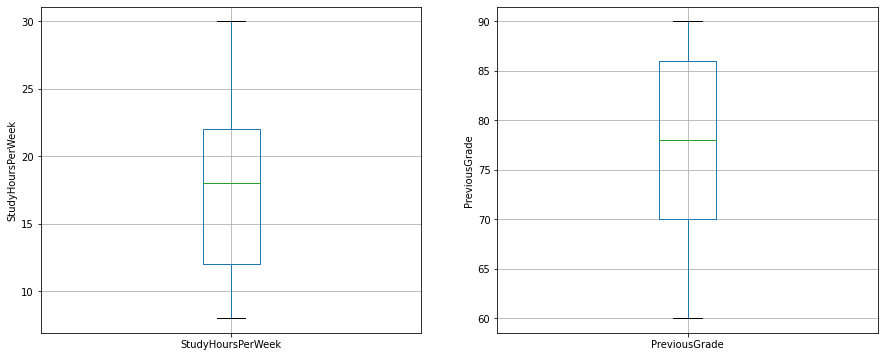

In [6]:
# let's make boxplots to visualise outliers in the continuous variables 
# StudyHoursPerWeek and PreviousGrade

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='StudyHoursPerWeek')
fig.set_title('')
fig.set_ylabel('StudyHoursPerWeek')

plt.subplot(1, 2, 2)
fig = data.boxplot(column='PreviousGrade')
fig.set_title('')
fig.set_ylabel('PreviousGrade')